# Predicting Star Ratings Based on Amazon Review Comments of Electronic Products


For this project, I will be analyzing Amazon user reviews of electronic products. My goal is to predict the star-rating a user will give a product based on the review comment they give. Since the star rating prediction is only based on a text review, it serves as a proxy for building a sentiment classifier – assuming that star rating is truly representative of a review’s sentiment.

## Data Loading and Preliminary Exploration

Import libraries for data processing

In [122]:
import os #used to manage directories
import json #for reading JSON file
import pandas as pd # for data cleaning
import nltk #used for text preprocessing
import numpy as np #for data scrubbing


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path='/content/drive/My Drive/csvfiles/Amazon_reviews.csv'

In [4]:
df = pd.read_csv(file_path)

print(df.shape)
df.head()


(5000, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [6]:
# from the above we can observe there no null values from rating and text

## Text Preprocessing

First, I wanted to check the datatypes of each variable in my dfd dataframe

In [7]:
df.dtypes

id                      object
dateAdded               object
dateUpdated             object
name                    object
asins                   object
brand                   object
categories              object
primaryCategories       object
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
reviews.date            object
reviews.dateAdded       object
reviews.dateSeen        object
reviews.doRecommend       bool
reviews.id             float64
reviews.numHelpful       int64
reviews.rating           int64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
sourceURLs              object
dtype: object

I converted the star rating column from integer to string so that it could properly feed into subsequent modeling

In [8]:
df['reviews.rating'] = df['reviews.rating'].astype(str)

My next step was to tokenize the words in each record's review text

In [9]:
from nltk import word_tokenize

tokens = [word_tokenize(sen) for sen in df['reviews.text']]
# df['raw_tokens'] = tokens

Then I removed all stop words from the tokenized word list, like "this" and "it's"

In [10]:
from nltk.corpus import stopwords

stoplist = stopwords.words('english')

def removeStopWords(tokens):
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in tokens]

df['raw_tokens'] = filtered_words #join to dataframe

# df['Text_Final'] = [' '.join(sen) for sen in filtered_words]
# df['tokens'] = filtered_words

A snapshot of tokens with removed stop words is seen in the raw_tokens column below.

In [11]:
df.head(5)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,raw_tokens
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,"[I, thought, would, big, small, paper, turn, l..."
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,"[This, kindle, light, easy, use, especially, b..."
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,"[Didnt, know, much, 'd, use, kindle, went, low..."
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,"[I, 100, happy, purchase, ., I, caught, sale, ..."
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,"[Solid, entry, level, Kindle, ., Great, kids, ..."


Then I further normalized the data by removing non_ascii words, making everything lowercase, removing punctuation marks, and replacing numbers with words. This is accomplished by the series of functions below.
Some code snippets were pulled from https://www.kdnuggets.com/2018/03/text-data-preprocessing-walkthrough-python.html

In [12]:

import re, string, unicodedata
# import contractions
import inflect
from nltk.corpus import stopwords

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words


def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

#remove all punctuation
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words


def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    return words


The functions were applied to each record in the dfd dataframe. The updated normalized tokens are seen in the tokens column below.

In [13]:
df['tokens'] = df['raw_tokens'].apply(lambda x: normalize(x))
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,raw_tokens,tokens
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...,"[I, thought, would, big, small, paper, turn, l...","[i, thought, would, big, small, paper, turn, l..."
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...,"[This, kindle, light, easy, use, especially, b...","[this, kindle, light, easy, use, especially, b..."
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...,"[Didnt, know, much, 'd, use, kindle, went, low...","[didnt, know, much, d, use, kindle, went, lowe..."
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...,"[I, 100, happy, purchase, ., I, caught, sale, ...","[i, one hundred, happy, purchase, i, caught, s..."
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...,"[Solid, entry, level, Kindle, ., Great, kids, ...","[solid, entry, level, kindle, great, kids, gif..."


Lastly, I performed stemming on each of the token words. I chose to use Lemmatization, which is a type of stemming technique. These were applied to the same tokens column above.

In [14]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [15]:
df['tokens'] = df['tokens'].apply(lambda x: lemmatize_verbs(x))

The next few cells below show the progession of the tokenization and preprocessing for a df review.

The raw text is shown below.

In [16]:
df['reviews.text'][813]

'I am loving my Amazon Echo Show. It makes life easier! I love being able to ask what the weather is going to be or play some music just by asking Alexa. I also love being able to video call friends and family that have an Echo Show or the Alexa App. Overall it is a great product!'

The tokenized version with removed stopwords is below.

In [17]:
print(df['raw_tokens'][813])

['I', 'loving', 'Amazon', 'Echo', 'Show', '.', 'It', 'makes', 'life', 'easier', '!', 'I', 'love', 'able', 'ask', 'weather', 'going', 'play', 'music', 'asking', 'Alexa', '.', 'I', 'also', 'love', 'able', 'video', 'call', 'friends', 'family', 'Echo', 'Show', 'Alexa', 'App', '.', 'Overall', 'great', 'product', '!']


And the tokens with complete normalization is shown below.

In [18]:
print(df['tokens'][813])

['i', 'love', 'amazon', 'echo', 'show', 'it', 'make', 'life', 'easier', 'i', 'love', 'able', 'ask', 'weather', 'go', 'play', 'music', 'ask', 'alexa', 'i', 'also', 'love', 'able', 'video', 'call', 'friends', 'family', 'echo', 'show', 'alexa', 'app', 'overall', 'great', 'product']


In [19]:
freq_words = df.tokens.str.split(expand = True).stack().value_counts()
freq_words

Series([], dtype: int64)

### Word Clouds for Distribution of Words

I was curious how the distribution of words varied for reviews with different star ratings. As a way to visualize this, I created word clouds of the reviews for each star rating 1-5. To supplement this, I also calcuated the top 10 most frequent words and counts for each star rating.

The function below filters the dfd dataframe on a designated star-rating (e.g. '1'). Then, a list is created that joins all normalized tokens across all records into a list.

In [20]:
def text_per_rating(rating):
    df_rating = df[df['reviews.rating'] == rating]
    text_list = df_rating['tokens'].tolist() #convert review text to list of tokens
    text_list = list([a for b in text_list for a in b]) #merge across records into a single list
    # text_list[0:50]
    text_list = ' '.join(map(str, text_list)) #remove commas and create list of all words in dataset separated by space
    # concat_text = text_list.str.cat(sep =', ')
    # text_list[0:100]
    return text_list

From this list, the function below counts the frequency of the top 10 words per designated star rating.

In [21]:
from collections import Counter

def freq(rating):
    str_list = text_per_rating(rating)
    str_list = str_list.split()
#     unique_words = set(str_list)
    counts = Counter(str_list)
    counts = counts.most_common(10)
    return counts

In [22]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

def plot_word_clouds(rating):
    text_list = text_per_rating(rating)
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(["album", "song", "cd", "music", "songs"])

    # text_cloud = df['reviews.text']
    text_cloud = str(text_list)
    wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text_cloud)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title('Word cloud for {} star rating'.format(rating))
    plt.axis("off")
    plt.show()

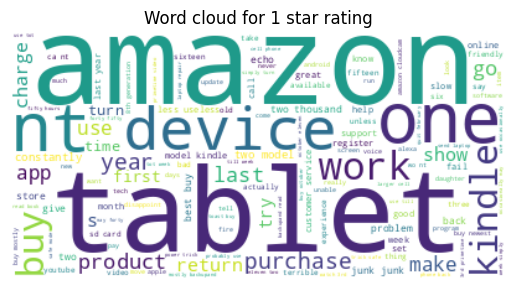

In [23]:
plot_word_clouds('1')

In [24]:
freq('1')

[('i', 124),
 ('buy', 39),
 ('use', 33),
 ('it', 29),
 ('two', 28),
 ('nt', 26),
 ('amazon', 26),
 ('kindle', 21),
 ('last', 20),
 ('get', 18)]

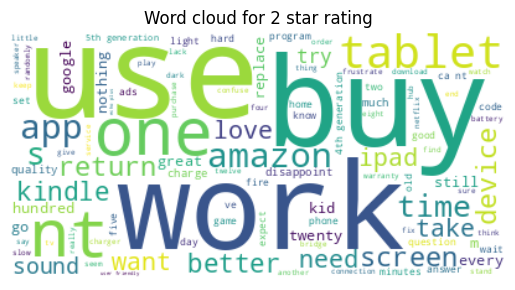

In [25]:
plot_word_clouds('2')

In [26]:
freq('2')

[('i', 77),
 ('use', 20),
 ('nt', 19),
 ('buy', 18),
 ('work', 17),
 ('one', 15),
 ('the', 13),
 ('amazon', 13),
 ('would', 12),
 ('tablet', 12)]

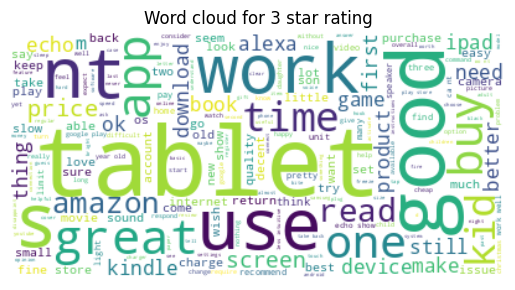

In [27]:
plot_word_clouds('3')

In [28]:
freq('3')

[('i', 213),
 ('tablet', 70),
 ('the', 54),
 ('good', 54),
 ('nt', 53),
 ('work', 47),
 ('s', 46),
 ('it', 43),
 ('use', 40),
 ('buy', 39)]

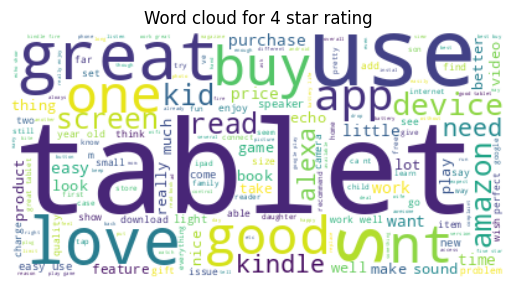

In [29]:
plot_word_clouds('4')

In [30]:
freq('4')

[('i', 1097),
 ('tablet', 420),
 ('use', 402),
 ('great', 362),
 ('it', 268),
 ('the', 263),
 ('good', 257),
 ('love', 252),
 ('s', 243),
 ('nt', 239)]

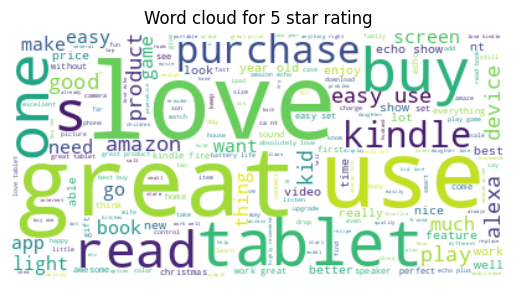

In [31]:
plot_word_clouds('5')

In [32]:
freq('5')

[('i', 3160),
 ('love', 1443),
 ('great', 1191),
 ('use', 1041),
 ('buy', 825),
 ('tablet', 788),
 ('easy', 631),
 ('the', 630),
 ('kindle', 602),
 ('one', 597)]

As seen from the word clouds and frequencies above, there is a very similar distribution of common words across all star ratings. Even among 1 star ratings, words like "good", "great", and "love" were still very common. However, it's possible these sentiments were negated with preceeding words like 'not good'.

## Predictive Models for Star Rating

### Bag of Words Method

With the BOW method, a matrix of vectors is created that represents the frequency of each word. Each vector corresponds to a review, and the width of each vector is the number of all distinct words in the entire corpus across all records.

#### Testing on SVM Model

Split training and test data

In [33]:
print(df['tokens'][813])

['i', 'love', 'amazon', 'echo', 'show', 'it', 'make', 'life', 'easier', 'i', 'love', 'able', 'ask', 'weather', 'go', 'play', 'music', 'ask', 'alexa', 'i', 'also', 'love', 'able', 'video', 'call', 'friends', 'family', 'echo', 'show', 'alexa', 'app', 'overall', 'great', 'product']


In [34]:
from sklearn.model_selection import train_test_split

# sentences = df['tokens'].values
sentences = df['tokens'].str.join(' ') ## join values into string
y = df['reviews.rating'].values
# y = dummy_y

sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.25, random_state=10)

In [35]:
sentences_train[813]

'i love amazon echo show it make life easier i love able ask weather go play music ask alexa i also love able video call friends family echo show alexa app overall great product'

Vectorize the training and test data

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)



Train the model

In [37]:
from sklearn.svm import SVC

from datetime import datetime
start_time = datetime.now()

classifier_svc = SVC()
classifier_svc.fit(X_train, y_train)
score = classifier_svc.score(X_test, y_test)
score_train = classifier_svc.score(X_train, y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time)) #print out how long it took for model to train

Duration: 0:00:13.640926


Below, I explored the use of Pickle, which is used for saving trained models as objects that can be loaded at a later time. For some reason, the accuracy of my models drastically fluctuated when reloading the saved pickle objects.

Accuracy of the SVM model is printed below.

In [38]:
print("Training Accuracy:", score_train) #print accuracy of SVM model
print("Testing Accuracy:", score) #print accuracy of SVM model


Training Accuracy: 0.8181333333333334
Testing Accuracy: 0.7176


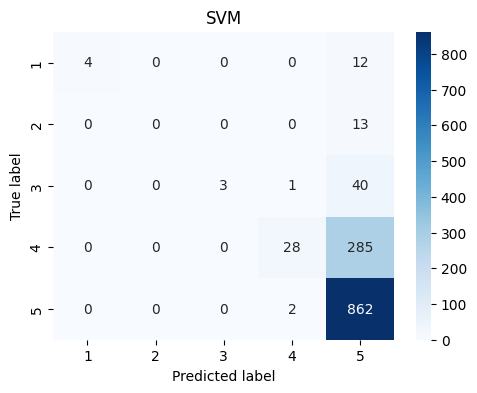

Accuracy: 0.7176


In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# clf = SVC(kernel = 'linear').fit(x_train,y_train)
# clf.predict(x_train)
# y_pred = clf.predict(x_test)
predictions = classifier_svc.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test, predictions)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1', '2', '3', '4', '5'],
                     columns = ['1', '2', '3', '4', '5'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'g', cmap = 'Blues')
# plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(model.evaluate(X_test, y_test, verbose=False)))
# plt.title("Training Accuracy: {:.4f}".format(accuracy_trn) + "\n Testing Accuracy:  {:.4f}".format(accuracy_test))
plt.title("SVM")
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
plt.show()

# loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
# print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
# print("Testing Accuracy:  {:.4f}".format(accuracy))
score = classifier_svc.score(X_test, y_test)
print("Accuracy:", score) #print accuracy of SVM model

In [40]:
from keras import backend as K

def recall_m(y_test, predictions):
    true_positives = K.sum(K.round(K.clip(y_test * predictions, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * predictions, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(predictions, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_test, predictions):
    precision = precision_m(y_test, predictions)
    recall = recall_m(y_test, predictions)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

The output below shows additional performance metrics for my SVM model. As seen, the F1 score is fairly low, which measures the balance of precision and recall. This same output was done for all subsequent models.

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      0.25      0.40        16
           2       0.00      0.00      0.00        13
           3       1.00      0.07      0.13        44
           4       0.90      0.09      0.16       313
           5       0.71      1.00      0.83       864

    accuracy                           0.72      1250
   macro avg       0.72      0.28      0.30      1250
weighted avg       0.77      0.72      0.62      1250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
pred_stars = predictions.tolist()
# pred_stars = [x+1 for x in pred_stars]
pred_stars[0:4]

['5', '5', '5', '5']

In [43]:
test_indexes = sentences_test.index
# df.iloc[test_indexes]
# df.iloc[[5441],:]

A key performance metric I wanted to evaluate was how close my star rating predictions were to the actual rating. The dataframe below captures the absolute difference between the actual and predicted rating in the "diff_pred" column. This dataframe snapshot is of the records with the biggest difference between prediction and rating (the worst performers). This same output was done for all subsequent models.

In [44]:
pd.options.display.max_colwidth = 100

df_df_test = df.loc[test_indexes]
df_df_test['pred_stars'] = pred_stars

df_df_test['diff_pred'] = abs(pd.to_numeric(df_df_test['pred_stars']) - pd.to_numeric(df_df_test['reviews.rating']))

df_df_test = df_df_test.sort_values(by = ['diff_pred'], ascending = False)

df_df_test = df_df_test.filter(['reviews.rating', 'reviews.text', 'tokens', 'pred_stars', 'diff_pred'])
df_df_test.head(10)

,reviews.rating,reviews.text,tokens,pred_stars,diff_pred
2507,1,My first tablet was a Kindle. I was curious about the updated version. Very disappointed,"[my, first, tablet, kindle, i, curious, update, version, very, disappoint]",5,4
2485,1,This is just a regular fire tablet that has protective case.,"[this, regular, fire, tablet, protective, case]",5,4
265,1,Purchased this device at launch (2 pack for $384.xx) and now YouTube doesn't work. YouTube was o...,"[purchase, device, launch, two, pack, 384xx, youtube, nt, work, youtube, one, main, feature, i, ...",5,4
1913,1,It takes forever to download apps. I'm returning it will be getting something else.,"[it, take, forever, download, apps, i, m, return, get, something, else]",5,4
3164,1,Has a very good Bluetooth speakers sound quality is good but otherwise she's pretty useless when...,"[have, good, bluetooth, speakers, sound, quality, good, otherwise, s, pretty, useless, come, get...",5,4
515,1,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, ba...","[worthless, except, regular, echo, poor, excuse, video, chat, i, love, echo, devices, bathroom, ...",5,4
4430,1,This is not like other android tablets in a bad way.,"[this, like, android, tablets, bad, way]",5,4
3674,1,"was cheap, can not run chrome stuff, returned to store.","[cheap, run, chrome, stuff, return, store]",5,4
4349,1,Too bad Amazon turned this tablet into a big advertising tool. Many apps dont work and the camer...,"[too, bad, amazon, turn, tablet, big, advertise, tool, many, apps, dont, work, camera, good]",5,4
3949,1,I brought this tablet during the Black Friday sale fast forward to Christmas when my 6 year open...,"[i, bring, tablet, black, friday, sale, fast, forward, christmas, six, year, open, happy, i, set...",5,4


I also output the frequency of differences in star predictions. As seen below, the vast majority of predictions were either correct or within a 1-star rating. This same output was done for all subsequent models.

In [45]:
df_df_test.groupby(['diff_pred']).size()

diff_pred
0    897
1    288
2     40
3     13
4     12
dtype: int64

### Testing on Neural Net

For labeled data, encode the possible start values 1-5 into columns

In [46]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

Y = df['reviews.rating'].values
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y =to_categorical(encoded_Y)
dummy_y

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

On updated data, re-split into training vs. validation data

In [47]:
from sklearn.model_selection import train_test_split

# sentences = df['Text_Final'].values
sentences = df['tokens'].str.join(' ') ## join values into string
#y = df['reviews.rating'].values
y = dummy_y # use encoded labels for y

sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.25, random_state=10)

A sparse matrix is created the input vecotrs

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<3750x4133 sparse matrix of type '<class 'numpy.int64'>'
	with 57952 stored elements in Compressed Sparse Row format>

In [49]:
from keras.models import Sequential
from keras import layers


input_dim = X_train.shape[1]  # Number of features


model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(0.4)) ##added dropout layer
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                41340     
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
Total params: 41395 (161.70 KB)
Trainable params: 41395 (161.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train Model

In [50]:
start_time = datetime.now()

nn_bow = model.fit(X_train, y_train,
epochs=20,
verbose=False,
validation_data=(X_test, y_test),
batch_size = 10)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time)) #print out how long it took for model to train

Duration: 0:00:30.249034


In [51]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9461
Testing Accuracy:  0.7296


In [52]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(nn_bow):
    acc = nn_bow.history['accuracy']
    val_acc = nn_bow.history['val_accuracy']
    loss = nn_bow.history['loss']
    val_loss = nn_bow.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


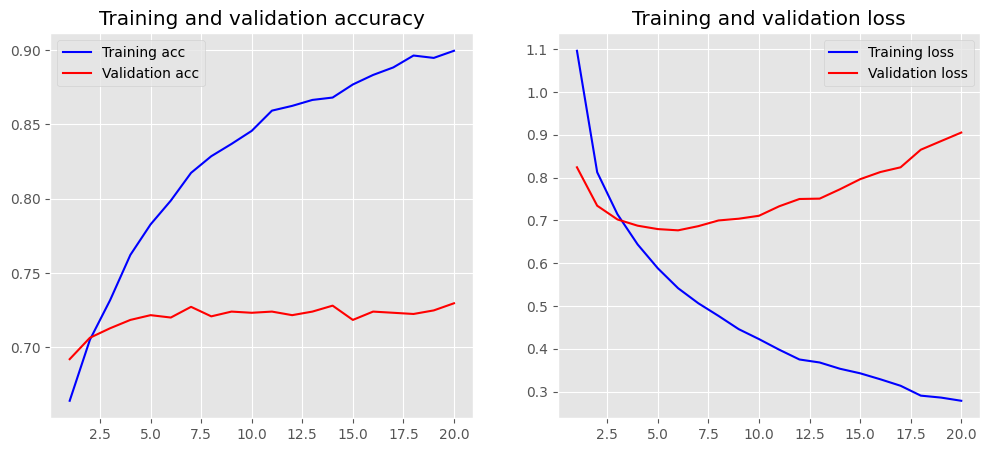

In [53]:
plot_history(nn_bow)

Alternative baseline model:https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [54]:
loss_trn, accuracy_trn = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy_trn))
loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy_test))

Training Accuracy: 0.9461
Testing Accuracy:  0.7296


40/40 [==============================] - 0s 1ms/step


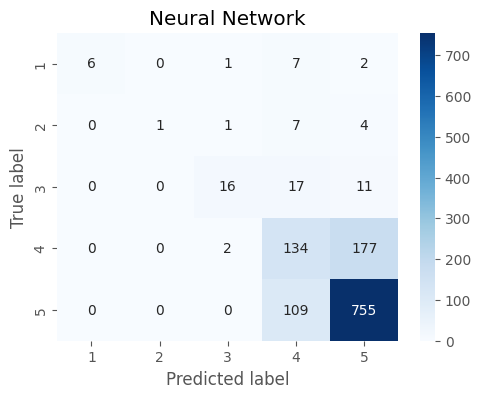

Training Accuracy: 0.9461
Testing Accuracy:  0.7296


In [55]:
import seaborn as sns
# clf = SVC(kernel = 'linear').fit(x_train,y_train)
# clf.predict(x_train)
# y_pred = clf.predict(x_test)

predictions = model.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test.argmax(axis = 1), predictions.argmax(axis = 1))

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1', '2', '3', '4', '5'],
                     columns = ['1', '2', '3', '4', '5'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'g', cmap = 'Blues')
# plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(model.evaluate(X_test, y_test, verbose=False)))
# plt.title("Training Accuracy: {:.4f}".format(accuracy_trn) + "\n Testing Accuracy:  {:.4f}".format(accuracy_test))
plt.title("Neural Network")
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
plt.show()

loss_trn, accuracy_trn = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy_trn))
loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy_test))

In [56]:
from keras import backend as K

def recall_m(y_test, predictions):
    true_positives = K.sum(K.round(K.clip(y_test * predictions, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * predictions, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(predictions, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_test, predictions):
    precision = precision_m(y_test, predictions)
    recall = recall_m(y_test, predictions)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [57]:
from sklearn.metrics import classification_report

y_test_norm = y_test.argmax(axis = 1)
y_test_norm

predictions = model.predict(X_test, batch_size = 64, verbose = 1)
y_pred = np.argmax(predictions, axis = 1)
y_pred

print(classification_report(y_test_norm, y_pred))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        16
           1       1.00      0.08      0.14        13
           2       0.80      0.36      0.50        44
           3       0.49      0.43      0.46       313
           4       0.80      0.87      0.83       864

    accuracy                           0.73      1250
   macro avg       0.82      0.42      0.50      1250
weighted avg       0.72      0.73      0.72      1250



In [58]:
y_test.argmax(axis = 1)

array([4, 4, 4, ..., 4, 4, 4])

In [59]:
pred_stars = predictions.argmax(axis = 1).tolist()
pred_stars = [x+1 for x in pred_stars]
pred_stars[0:4]

[5, 4, 5, 5]

In [60]:
test_indexes = sentences_test.index
# df.iloc[test_indexes]
# df.iloc[[5441],:]

In [61]:
pd.options.display.max_colwidth = 100

df_df_test = df.loc[test_indexes]
df_df_test['pred_stars'] = pred_stars

df_df_test['diff_pred'] = abs(df_df_test['pred_stars'] - pd.to_numeric(df_df_test['reviews.rating']))

# df_df_test = df_df_test.sort_values(by = ['diff_pred'], ascending = False)

df_df_test = df_df_test.filter(['reviews.rating', 'reviews.text', 'tokens', 'pred_stars', 'diff_pred'])
df_df_test.head(10)

,reviews.rating,reviews.text,tokens,pred_stars,diff_pred
245,5,Works great! Now if my dogs would actually answer when I call it would be even better! They‚Äôre...,"[work, great, now, dog, would, actually, answer, i, call, would, even, better, theyaore, interes...",5,0
4493,5,Not bad for the price and what it can do. It's decent just for web browsing.,"[not, bad, price, it, s, decent, web, browse]",4,1
4583,5,Very happy with my purchase. The tablet works amazingly good for the price.,"[very, happy, purchase, the, tablet, work, amazingly, good, price]",5,0
2242,5,Since I purchased mine the wife thought she would also like one so we picked up her one and she ...,"[since, i, purchase, mine, wife, think, would, also, like, one, pick, one, use, lot]",5,0
3407,5,"This eReader is great, I have started reading more now that I have this kindle than when I read ...","[this, ereader, great, i, start, read, i, kindle, i, read, paperbacks, if, tear, buy, someone, e...",5,0
807,5,Great product and it is very easy to set up and use,"[great, product, easy, set, use]",5,0
693,4,"FUN TO USE FOR ANY AGE JUST SAY ALEXA""""""""""""""""""""""""""""","[fun, to, use, for, any, age, just, say, alexa]",5,1
515,1,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, ba...","[worthless, except, regular, echo, poor, excuse, video, chat, i, love, echo, devices, bathroom, ...",5,4
3224,5,I bought this Tablet for my Wife. She uses it every day. It is very usefulto her. She uses it in...,"[i, buy, tablet, wife, she, use, every, day, it, usefulto, she, use, place, computer, she, watch...",5,0
549,5,"Great product, i recommend is easy to use and fast.","[great, product, recommend, easy, use, fast]",5,0


In [62]:
df_df_test.groupby(['diff_pred']).size()

diff_pred
0    912
1    306
2     19
3     11
4      2
dtype: int64

## Word Embedding

There are 3 main ways to embed:
1. Words represented by each word as a vector
2. Characters represented by each character as a vector
3. N-grams of words/characters represented as a vector (N-grams are overlapping groups of multiple succeeding words/characters in the text)

I will use method #1. Two ways to do this is via one-hot encoding and word embeddings.

### One-hot encoding

In [63]:
Y = df['reviews.rating'].values
encoder = LabelEncoder()
encoder.fit(Y)
star_labels = encoder.fit_transform(Y)
star_labels

array([2, 4, 3, ..., 3, 4, 4])

In [64]:
from sklearn.preprocessing import OneHotEncoder

len_star = len(star_labels)

encoder = OneHotEncoder(sparse=False)
star_labels = star_labels.reshape((len_star, 1))
encoder.fit_transform(star_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

### Using Word Embeddings

Use Keras' tokenizer to tokenize all words as numeric values. Using the num_words parameter does not have

In [65]:
sentences_train.iloc[2]

'i buy tablet grandson absolutely love'

In [66]:
from keras.preprocessing.text import Tokenizer

# tokenizer = Tokenizer(num_words = None) #don't filter on top N most common words
tokenizer = Tokenizer(num_words = 5000) # filter on top 5000 most common words
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index)+1  #adding 1 because of reserved 0 index


print(sentences_train[51]) #print df review
print(X_train[2]) #print word indexing of df reiew
len(X_train[2]) #count number of words in df review

the kindle good download apps book catch read
[1, 6, 5, 136, 220, 2]


6

Find index of df words

In [67]:
for word in ['good', 'bad', 'terrible']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

good: 20
bad: 512
terrible: 1014


Find top 10 most frequent words

In [68]:
tokens_list = list(tokenizer.word_index)
tokens_list[0:10]

['i', 'love', 'great', 'use', 'tablet', 'buy', 'the', 'it', 'one', 'get']

### Padding

In [69]:
maxlen = max([len(listElem.split()) for listElem in sentences]) ##find length of review with max number of words

In [70]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0:5, :])

[[  1   2  60 ...   0   0   0]
 [708  19  37 ...   0   0   0]
 [  1   6   5 ...   0   0   0]
 [ 14 126   5 ...   0   0   0]
 [ 14   3   5 ...   0   0   0]]


In [71]:
from keras.models import Sequential
from keras import layers
from keras import regularizers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model.add(layers.Flatten())
# model.add(layers.Dense(10, activation='relu', kernel_regularizer=regularizers.l2(l=0.1)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 868, 50)           207500    
                                                                 
 flatten (Flatten)           (None, 43400)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                434010    
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
Total params: 641565 (2.45 MB)
Trainable params: 641565 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
start_time = datetime.now()

nn_embed = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time)) #print out how long it took for model to train



Duration: 0:02:22.687328


In [73]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9997
Testing Accuracy:  0.7192


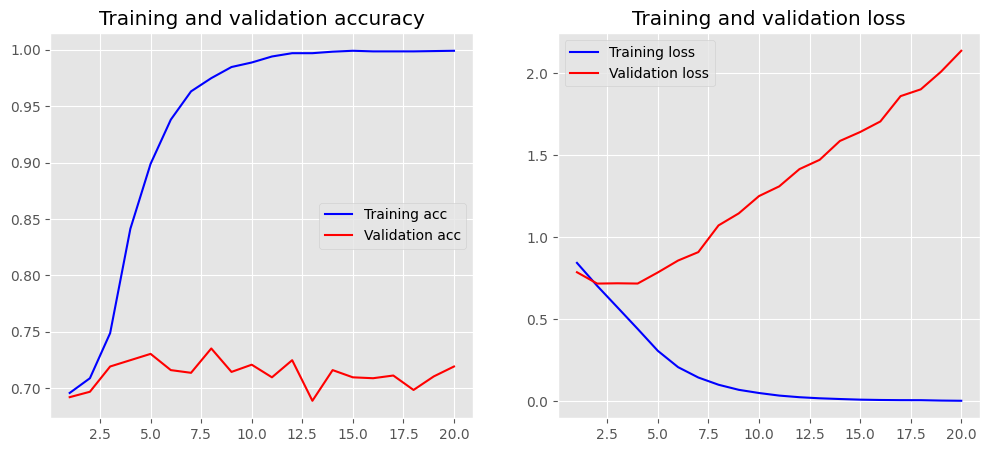

In [74]:
plot_history(nn_embed)

40/40 [==============================] - 0s 5ms/step


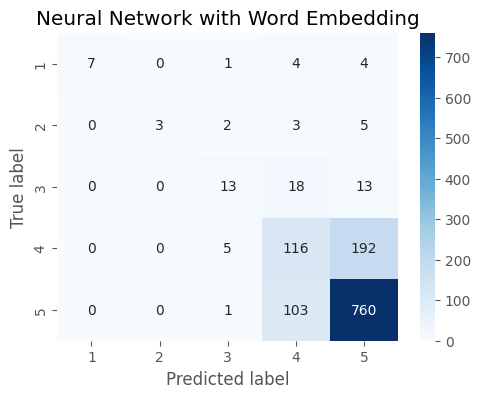

Training Accuracy: 0.9997
Testing Accuracy:  0.7192


In [75]:
import seaborn as sns
# clf = SVC(kernel = 'linear').fit(x_train,y_train)
# clf.predict(x_train)
# y_pred = clf.predict(x_test)

predictions = model.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test.argmax(axis = 1), predictions.argmax(axis = 1))

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1', '2', '3', '4', '5'],
                     columns = ['1', '2', '3', '4', '5'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'g', cmap = 'Blues')
# plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(model.evaluate(X_test, y_test, verbose=False)))
# plt.title("Training Accuracy: {:.4f}".format(accuracy_trn) + "\n Testing Accuracy:  {:.4f}".format(accuracy_test))
plt.title("Neural Network with Word Embedding")
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
plt.show()

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


In [76]:
from sklearn.metrics import classification_report

y_test_norm = y_test.argmax(axis = 1)
y_test_norm

predictions = model.predict(X_test, batch_size = 64, verbose = 1)
y_pred = np.argmax(predictions, axis = 1)
y_pred

print(classification_report(y_test_norm, y_pred))

20/20 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.44      0.61        16
           1       1.00      0.23      0.38        13
           2       0.59      0.30      0.39        44
           3       0.48      0.37      0.42       313
           4       0.78      0.88      0.83       864

    accuracy                           0.72      1250
   macro avg       0.77      0.44      0.52      1250
weighted avg       0.70      0.72      0.70      1250



In [77]:
pred_stars = predictions.argmax(axis = 1).tolist()
pred_stars = [x+1 for x in pred_stars]
pred_stars[0:4]

[5, 5, 5, 4]

In [78]:
test_indexes = sentences_test.index
# df.iloc[test_indexes]
# df.iloc[[5441],:]

In [79]:
pd.options.display.max_colwidth = 100

df_df_test = df.loc[test_indexes]
df_df_test['pred_stars'] = pred_stars

df_df_test['diff_pred'] = abs(df_df_test['pred_stars'] - pd.to_numeric(df_df_test['reviews.rating']))

df_df_test = df_df_test.sort_values(by = ['diff_pred'], ascending = False)

df_df_test = df_df_test.filter(['reviews.rating', 'reviews.text', 'tokens', 'pred_stars', 'diff_pred'])
df_df_test.head(10)

,reviews.rating,reviews.text,tokens,pred_stars,diff_pred
4349,1,Too bad Amazon turned this tablet into a big advertising tool. Many apps dont work and the camer...,"[too, bad, amazon, turn, tablet, big, advertise, tool, many, apps, dont, work, camera, good]",5,4
3949,1,I brought this tablet during the Black Friday sale fast forward to Christmas when my 6 year open...,"[i, bring, tablet, black, friday, sale, fast, forward, christmas, six, year, open, happy, i, set...",5,4
515,1,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, ba...","[worthless, except, regular, echo, poor, excuse, video, chat, i, love, echo, devices, bathroom, ...",5,4
265,1,Purchased this device at launch (2 pack for $384.xx) and now YouTube doesn't work. YouTube was o...,"[purchase, device, launch, two, pack, 384xx, youtube, nt, work, youtube, one, main, feature, i, ...",5,4
1586,2,"Can't really give a full review since the Kindle Fire seemed to work properly, however, the secu...","[ca, nt, really, give, full, review, since, kindle, fire, seem, work, properly, however, securit...",5,3
1409,1,Returned product cause I did not like it and really had no use for it,"[return, product, cause, i, like, really, use]",4,3
3164,1,Has a very good Bluetooth speakers sound quality is good but otherwise she's pretty useless when...,"[have, good, bluetooth, speakers, sound, quality, good, otherwise, s, pretty, useless, come, get...",4,3
330,2,I bought these as a gift for my adult kids to video chat while in college. The second best featu...,"[i, buy, gift, adult, kid, video, chat, college, the, second, best, feature, youtube, amazon, se...",5,3
1676,2,I didn't find it useful for my 4yr old daugter so i returned it the other day.All the games in i...,"[i, nt, find, useful, 4yr, old, daugter, return, dayall, game, r, kiddy, game]",5,3
3674,1,"was cheap, can not run chrome stuff, returned to store.","[cheap, run, chrome, stuff, return, store]",4,3


In [80]:
df_df_test.groupby(['diff_pred']).size()

diff_pred
0    899
1    320
2     18
3      9
4      4
dtype: int64

## CNN

In [81]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 2, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 868, 100)          415000    
                                                                 
 conv1d (Conv1D)             (None, 867, 128)          25728     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 442073 (1.69 MB)
Trainable params: 442073 (1.69 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [82]:
start_time = datetime.now()

cnn_model = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time)) #print out how long it took for model to train


Duration: 0:07:22.858922


In [83]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9997
Testing Accuracy:  0.7224


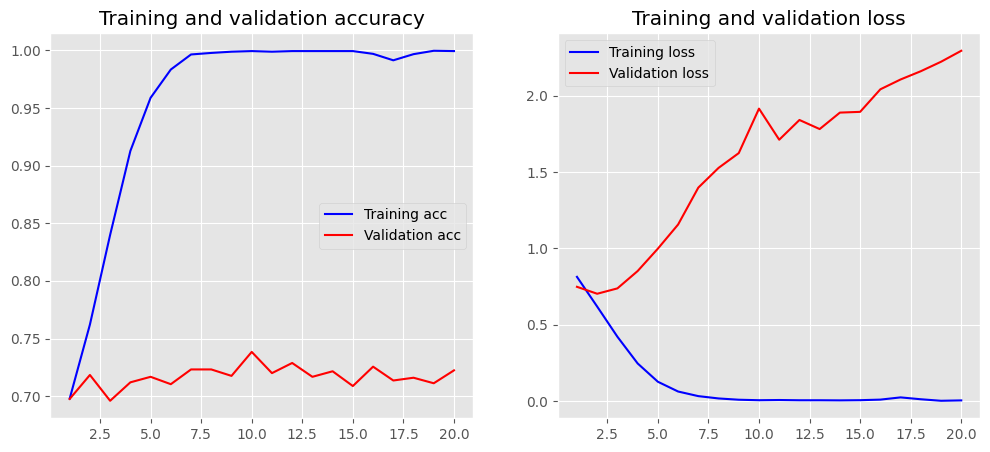

In [84]:
plot_history(cnn_model)

In [85]:
y_test[1]

array([0., 0., 0., 0., 1.], dtype=float32)

40/40 [==============================] - 1s 35ms/step


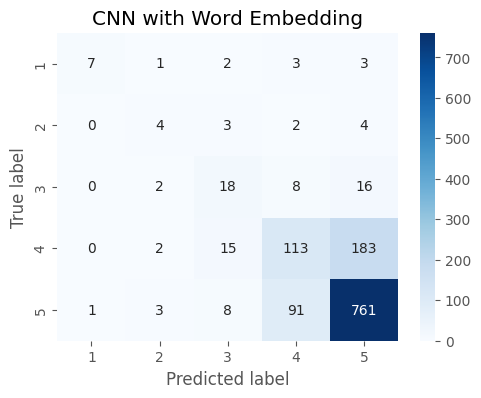

Training Accuracy: 0.9997
Testing Accuracy:  0.7224


In [86]:
import seaborn as sns
# clf = SVC(kernel = 'linear').fit(x_train,y_train)
# clf.predict(x_train)
# y_pred = clf.predict(x_test)

predictions = model.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test.argmax(axis = 1), predictions.argmax(axis = 1))

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1', '2', '3', '4', '5'],
                     columns = ['1', '2', '3', '4', '5'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'g', cmap = 'Blues')
# plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(model.evaluate(X_test, y_test, verbose=False)))
# plt.title("Training Accuracy: {:.4f}".format(accuracy_trn) + "\n Testing Accuracy:  {:.4f}".format(accuracy_test))
plt.title("CNN with Word Embedding")
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
plt.show()

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [87]:
from keras import backend as K

def recall_m(y_test, predictions):
    true_positives = K.sum(K.round(K.clip(y_test * predictions, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_test * predictions, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(predictions, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_test, predictions):
    precision = precision_m(y_test, predictions)
    recall = recall_m(y_test, predictions)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [88]:
from sklearn.metrics import classification_report

y_test_norm = y_test.argmax(axis = 1)
y_test_norm

predictions = model.predict(X_test, batch_size = 64, verbose = 1)
y_pred = np.argmax(predictions, axis = 1)
y_pred

print(classification_report(y_test_norm, y_pred))

20/20 [==============================] - 2s 96ms/step
              precision    recall  f1-score   support

           0       0.88      0.44      0.58        16
           1       0.33      0.31      0.32        13
           2       0.39      0.41      0.40        44
           3       0.52      0.36      0.43       313
           4       0.79      0.88      0.83       864

    accuracy                           0.72      1250
   macro avg       0.58      0.48      0.51      1250
weighted avg       0.70      0.72      0.71      1250



In [89]:
pred_stars = predictions.argmax(axis = 1).tolist()
pred_stars = [x+1 for x in pred_stars]
pred_stars[0:4]

[5, 2, 5, 5]

In [90]:
test_indexes = sentences_test.index
# df.iloc[test_indexes]
# df.iloc[[5441],:]

In [91]:
pd.options.display.max_colwidth = 100

df_df_test = df.loc[test_indexes]
df_df_test['pred_stars'] = pred_stars

df_df_test['diff_pred'] = abs(df_df_test['pred_stars'] - pd.to_numeric(df_df_test['reviews.rating']))

df_df_test = df_df_test.sort_values(by = ['diff_pred'], ascending = False)

df_df_test = df_df_test.filter(['reviews.rating', 'reviews.text', 'tokens', 'pred_stars', 'diff_pred'])
df_df_test.head(10)

,reviews.rating,reviews.text,tokens,pred_stars,diff_pred
3866,5,I thought that this tablet was junk but it has surpassed my expectations,"[i, think, tablet, junk, surpass, expectations]",1,4
3949,1,I brought this tablet during the Black Friday sale fast forward to Christmas when my 6 year open...,"[i, bring, tablet, black, friday, sale, fast, forward, christmas, six, year, open, happy, i, set...",5,4
515,1,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, ba...","[worthless, except, regular, echo, poor, excuse, video, chat, i, love, echo, devices, bathroom, ...",5,4
2485,1,This is just a regular fire tablet that has protective case.,"[this, regular, fire, tablet, protective, case]",5,4
3164,1,Has a very good Bluetooth speakers sound quality is good but otherwise she's pretty useless when...,"[have, good, bluetooth, speakers, sound, quality, good, otherwise, s, pretty, useless, come, get...",4,3
1586,2,"Can't really give a full review since the Kindle Fire seemed to work properly, however, the secu...","[ca, nt, really, give, full, review, since, kindle, fire, seem, work, properly, however, securit...",5,3
3296,5,"I bought this for my daughter who wanted an iPad, but for about half the price she is completely...","[i, buy, daughter, want, ipad, half, price, completely, happy, even, call, ipad, i, think, i, ma...",2,3
2013,5,This tablet can be literally dropped over a thousand times and the screen wont crack. I bought t...,"[this, tablet, literally, drop, thousand, time, screen, wont, crack, i, buy, hd, six, come, daug...",2,3
3668,2,fire tablet is very powerful for the size and does everything!,"[fire, tablet, powerful, size, everything]",5,3
265,1,Purchased this device at launch (2 pack for $384.xx) and now YouTube doesn't work. YouTube was o...,"[purchase, device, launch, two, pack, 384xx, youtube, nt, work, youtube, one, main, feature, i, ...",4,3


In [92]:
df_df_test.groupby(['diff_pred']).size()

diff_pred
0    903
1    303
2     30
3     10
4      4
dtype: int64

## Pretrained GloVe Word Embedding

I created a function below to import and vectorize the word embedding that I had downloaded

In [93]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding = "utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

# 85% of the words in my dataset vocabuluary is captured in the GloVe word embedding vector.

In [96]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('/content/drive/My Drive/csvfiles/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

In [97]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.8520481927710843

### Testing on Neural Network

In [98]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim,
                           weights=[embedding_matrix],
                           input_length=maxlen,
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 868, 50)           207500    
                                                                 
 global_max_pooling1d_1 (Gl  (None, 50)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_6 (Dense)             (None, 10)                510       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
Total params: 208065 (812.75 KB)
Trainable params: 208065 (812.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
start_time = datetime.now()

nn_glove = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time)) #print out how long it took for model to train


Duration: 0:01:06.278679


In [100]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9731
Testing Accuracy:  0.7008


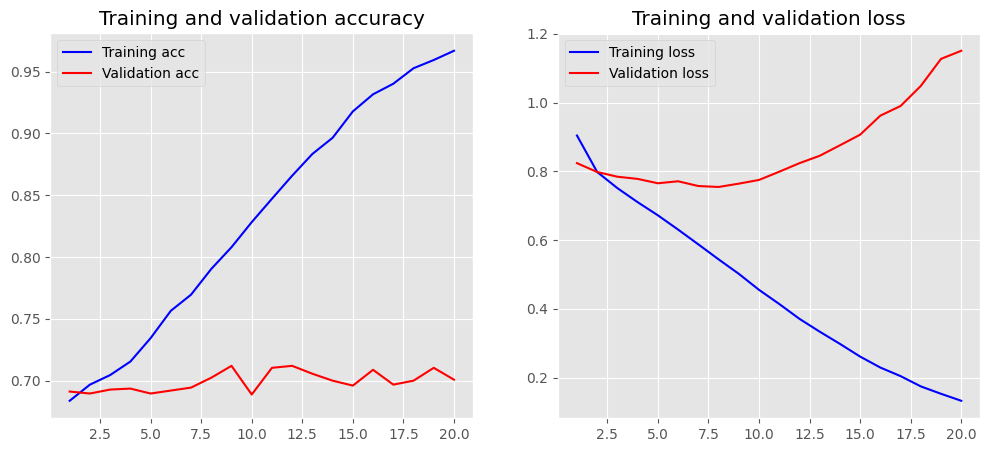

In [101]:
plot_history(nn_glove)

In [102]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
# y_pred = (predictions > 0.5)

# confusion_matrix(y_test, y_pred)

matrix = confusion_matrix(y_test.argmax(axis = 1), predictions.argmax(axis = 1))
matrix

40/40 [==============================] - 0s 4ms/step


array([[  5,   0,   1,   7,   3],
       [  0,   2,   3,   5,   3],
       [  0,   2,  10,  17,  15],
       [  0,   2,   6, 128, 177],
       [  0,   0,   4, 129, 731]])

40/40 [==============================] - 0s 5ms/step


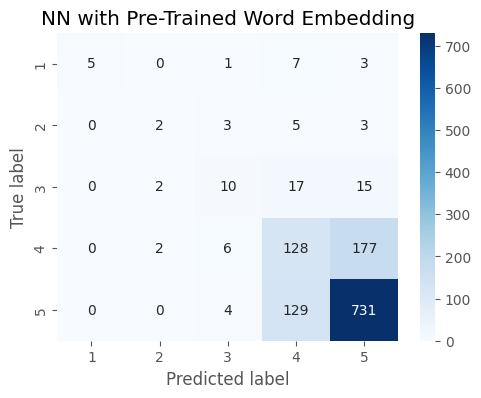

Training Accuracy: 0.9731
Testing Accuracy:  0.7008


In [103]:
import seaborn as sns
# clf = SVC(kernel = 'linear').fit(x_train,y_train)
# clf.predict(x_train)
# y_pred = clf.predict(x_test)

predictions = model.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test.argmax(axis = 1), predictions.argmax(axis = 1))

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1', '2', '3', '4', '5'],
                     columns = ['1', '2', '3', '4', '5'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'g', cmap = 'Blues')
# plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(model.evaluate(X_test, y_test, verbose=False)))
# plt.title("Training Accuracy: {:.4f}".format(accuracy_trn) + "\n Testing Accuracy:  {:.4f}".format(accuracy_test))
plt.title("NN with Pre-Trained Word Embedding")
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
plt.show()

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [104]:
from sklearn.metrics import classification_report

y_test_norm = y_test.argmax(axis = 1)
y_test_norm

predictions = model.predict(X_test, batch_size = 64, verbose = 1)
y_pred = np.argmax(predictions, axis = 1)
y_pred

print(classification_report(y_test_norm, y_pred))

20/20 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       1.00      0.31      0.48        16
           1       0.33      0.15      0.21        13
           2       0.42      0.23      0.29        44
           3       0.45      0.41      0.43       313
           4       0.79      0.85      0.82       864

    accuracy                           0.70      1250
   macro avg       0.60      0.39      0.44      1250
weighted avg       0.69      0.70      0.69      1250



In [105]:
pred_stars = predictions.argmax(axis = 1).tolist()
pred_stars = [x+1 for x in pred_stars]
pred_stars[0:4]

[5, 4, 5, 4]

In [106]:
test_indexes = sentences_test.index
# df.iloc[test_indexes]
# df.iloc[[5441],:]

In [108]:
pd.options.display.max_colwidth = 100

df_df_test = df.loc[test_indexes]
df_df_test['pred_stars'] = pred_stars

df_df_test['diff_pred'] = abs(df_df_test['pred_stars'] - pd.to_numeric(df_df_test['reviews.rating']))

df_df_test = df_df_test.sort_values(by = ['diff_pred'], ascending = False)

df_df_test = df_df_test.filter(['reviews.rating', 'reviews.text', 'tokens', 'pred_stars', 'diff_pred'])
df_df_test.head(10)

,reviews.rating,reviews.text,tokens,pred_stars,diff_pred
3949,1,I brought this tablet during the Black Friday sale fast forward to Christmas when my 6 year open...,"[i, bring, tablet, black, friday, sale, fast, forward, christmas, six, year, open, happy, i, set...",5,4
265,1,Purchased this device at launch (2 pack for $384.xx) and now YouTube doesn't work. YouTube was o...,"[purchase, device, launch, two, pack, 384xx, youtube, nt, work, youtube, one, main, feature, i, ...",5,4
515,1,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, ba...","[worthless, except, regular, echo, poor, excuse, video, chat, i, love, echo, devices, bathroom, ...",5,4
3674,1,"was cheap, can not run chrome stuff, returned to store.","[cheap, run, chrome, stuff, return, store]",4,3
1913,1,It takes forever to download apps. I'm returning it will be getting something else.,"[it, take, forever, download, apps, i, m, return, get, something, else]",4,3
1172,2,I really like the echo plus and the hue light bulb does work on the echo plus but I had to buy a...,"[i, really, like, echo, plus, hue, light, bulb, work, echo, plus, i, buy, bridge, phillips, orde...",5,3
4349,1,Too bad Amazon turned this tablet into a big advertising tool. Many apps dont work and the camer...,"[too, bad, amazon, turn, tablet, big, advertise, tool, many, apps, dont, work, camera, good]",4,3
2485,1,This is just a regular fire tablet that has protective case.,"[this, regular, fire, tablet, protective, case]",4,3
1586,2,"Can't really give a full review since the Kindle Fire seemed to work properly, however, the secu...","[ca, nt, really, give, full, review, since, kindle, fire, seem, work, properly, however, securit...",5,3
4323,1,My first tablet was a Kindle. I was curious about the updated version. Very disappointed,"[my, first, tablet, kindle, i, curious, update, version, very, disappoint]",4,3


In [109]:
df_df_test.groupby(['diff_pred']).size()

diff_pred
0    876
1    334
2     27
3     10
4      3
dtype: int64

### CNN with Pre-trained GloVe Embedding

In [110]:
from keras import optimizers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen,
                          weights = [embedding_matrix],
                          trainable = True))
model.add(layers.Conv1D(128, 5, activation= 'softmax'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))
optimizer = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = 'adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 868, 50)           207500    
                                                                 
 conv1d_1 (Conv1D)           (None, 864, 128)          32128     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_8 (Dense)             (None, 15)                1935      
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                 80        
                                                      

In [111]:
start_time = datetime.now()

cnn_glove = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time)) #print out how long it took for model to train


Duration: 0:08:23.354533


In [112]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9851
Testing Accuracy:  0.7040


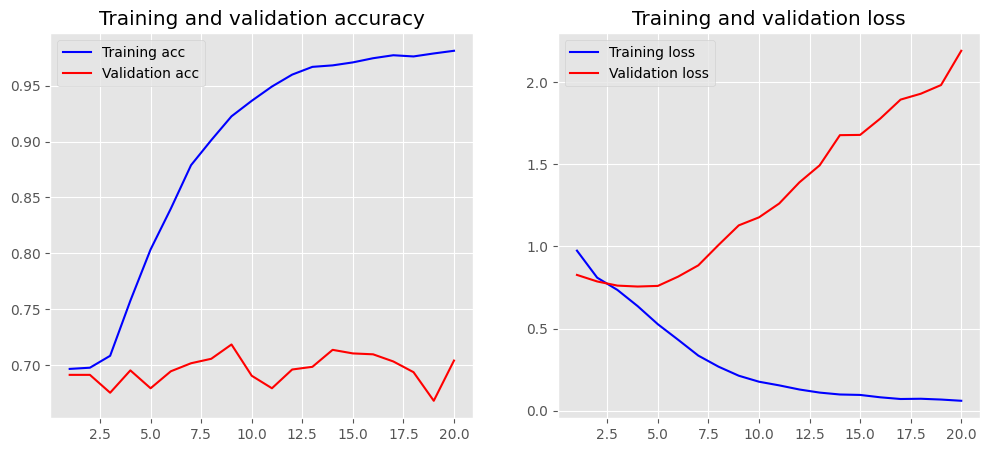

In [113]:
plot_history(cnn_glove)

In [114]:
from sklearn.metrics import confusion_matrix

predictions = model.predict(X_test)
# y_pred = (predictions > 0.5)

# confusion_matrix(y_test, y_pred)

matrix = confusion_matrix(y_test.argmax(axis = 1), predictions.argmax(axis = 1))
matrix

40/40 [==============================] - 3s 70ms/step


array([[  0,   2,   6,   5,   3],
       [  0,   3,   2,   4,   4],
       [  0,   1,  14,  13,  16],
       [  0,   0,   4, 129, 180],
       [  0,   2,   1, 127, 734]])

40/40 [==============================] - 2s 58ms/step


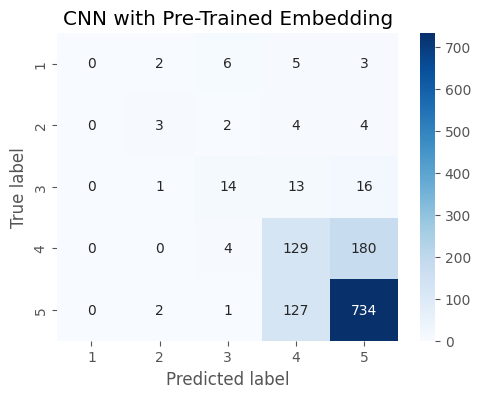

Training Accuracy: 0.9851
Testing Accuracy:  0.7040


In [115]:
import seaborn as sns
# clf = SVC(kernel = 'linear').fit(x_train,y_train)
# clf.predict(x_train)
# y_pred = clf.predict(x_test)

predictions = model.predict(X_test)

# Creates a confusion matrix
cm = confusion_matrix(y_test.argmax(axis = 1), predictions.argmax(axis = 1))

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1', '2', '3', '4', '5'],
                     columns = ['1', '2', '3', '4', '5'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt = 'g', cmap = 'Blues')
# plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(model.evaluate(X_test, y_test, verbose=False)))
# plt.title("Training Accuracy: {:.4f}".format(accuracy_trn) + "\n Testing Accuracy:  {:.4f}".format(accuracy_test))
plt.title("CNN with Pre-Trained Embedding")
plt.ylabel('True label')
plt.xlabel('Predicted label')
# plt.ticklabel_format(style = 'plain', axis = 'y', useOffset = False)
plt.show()

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [116]:
from sklearn.metrics import classification_report

y_test_norm = y_test.argmax(axis = 1)
y_test_norm

predictions = model.predict(X_test, batch_size = 64, verbose = 1)
y_pred = np.argmax(predictions, axis = 1)
y_pred

print(classification_report(y_test_norm, y_pred))

20/20 [==============================] - 3s 137ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.38      0.23      0.29        13
           2       0.52      0.32      0.39        44
           3       0.46      0.41      0.44       313
           4       0.78      0.85      0.82       864

    accuracy                           0.70      1250
   macro avg       0.43      0.36      0.39      1250
weighted avg       0.68      0.70      0.69      1250



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
pred_stars = predictions.argmax(axis = 1).tolist()
pred_stars = [x+1 for x in pred_stars]
pred_stars[0:4]

[5, 5, 5, 5]

In [118]:
test_indexes = sentences_test.index
# df.iloc[test_indexes]
# df.iloc[[5441],:]

In [120]:
pd.options.display.max_colwidth = 100

df_df_test = df.loc[test_indexes]
df_df_test['pred_stars'] = pred_stars

df_df_test['diff_pred'] = abs(df_df_test['pred_stars'] - pd.to_numeric(df_df_test['reviews.rating']))

df_df_test = df_df_test.sort_values(by = ['diff_pred'], ascending = False)

df_df_test = df_df_test.filter(['reviews.rating', 'reviews.text', 'tokens', 'pred_stars', 'diff_pred'])
df_df_test.head(10)

,reviews.rating,reviews.text,tokens,pred_stars,diff_pred
3949,1,I brought this tablet during the Black Friday sale fast forward to Christmas when my 6 year open...,"[i, bring, tablet, black, friday, sale, fast, forward, christmas, six, year, open, happy, i, set...",5,4
3164,1,Has a very good Bluetooth speakers sound quality is good but otherwise she's pretty useless when...,"[have, good, bluetooth, speakers, sound, quality, good, otherwise, s, pretty, useless, come, get...",5,4
515,1,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, ba...","[worthless, except, regular, echo, poor, excuse, video, chat, i, love, echo, devices, bathroom, ...",5,4
4904,2,The battery is having more and more trouble holding a charge. I bought the Fire in July and am n...,"[the, battery, trouble, hold, charge, i, buy, fire, july, charge, every, day, order, use, i, imp...",5,3
1409,1,Returned product cause I did not like it and really had no use for it,"[return, product, cause, i, like, really, use]",4,3
330,2,I bought these as a gift for my adult kids to video chat while in college. The second best featu...,"[i, buy, gift, adult, kid, video, chat, college, the, second, best, feature, youtube, amazon, se...",5,3
3674,1,"was cheap, can not run chrome stuff, returned to store.","[cheap, run, chrome, stuff, return, store]",4,3
2485,1,This is just a regular fire tablet that has protective case.,"[this, regular, fire, tablet, protective, case]",4,3
1172,2,I really like the echo plus and the hue light bulb does work on the echo plus but I had to buy a...,"[i, really, like, echo, plus, hue, light, bulb, work, echo, plus, i, buy, bridge, phillips, orde...",5,3
1676,2,I didn't find it useful for my 4yr old daugter so i returned it the other day.All the games in i...,"[i, nt, find, useful, 4yr, old, daugter, return, dayall, game, r, kiddy, game]",5,3


In [121]:
df_df_test.groupby(['diff_pred']).size()

diff_pred
0    880
1    329
2     27
3     11
4      3
dtype: int64